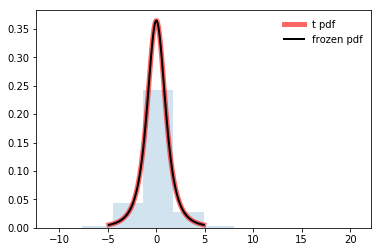

In [9]:
# In the Asymptotics lesson we also mentioned the Z statistic Z=(X'-mu)/(sigma/sqrt(n)) which follows a standard normal distribution. 
# This normalized statistic Z is especially nice because we know its mean and variance.

# So the mean and variance of the standardized normal are fixed and known. Now we'll define the t statistic which looks a lot like the Z. 
# It's defined as t=(X'-mu)/(s/sqrt(n)). Like the Z statistic, the t is centered around 0. The only difference between the two is that 
# the population std deviation, sigma, in Z is replaced by the sample standard deviation in the t. So the distribution of the t statistic 
# is independent of the population mean and variance. Instead it depends on the sample size n.

# As a result, for t distributions, the formula for computing a confidence interval is similar to what we did in the last lesson. 
# owever, instead of a quantile for a normal distribution we use a quantile for a t distribution. So the formula is  Est +/- t-quantile *std error(Est). 
# The other distinction, which we mentioned before, is that we'll use the sample standard deviation when we estimate the standard error of Est.

import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df = 2.74335149908
mean, var, skew, kurt = t.stats(df, moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(t.ppf(0.01, df),
              t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
         'r-', lw=5, alpha=0.6, label='t pdf')

# Alternatively, freeze the distribution and display the frozen pdf:
rv = t(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

# Generate random numbers:
r = t.rvs(df, size=1000)

# And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


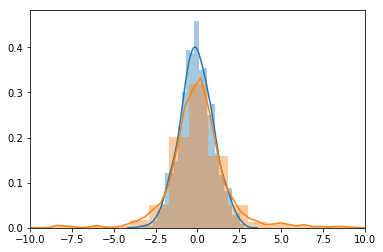

In [21]:
import seaborn as sns

def my_plot(df):
    # compare a normal distribution and t distribution
    normal = np.random.standard_normal(1000)
    tdata = np.random.standard_t(df, 1000)

    sns.distplot(normal, label="starndard normal")
    sns.distplot(tdata, label="standard t")
    plt.xlim(-10, 10)

# when degree freedom is 2
my_plot(2)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


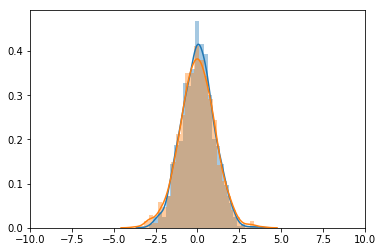

In [22]:
# when degree freedom is 20
my_plot(20)

In [26]:
# load sleep.csv data
import pandas as pd
df = pd.read_csv("sleep.csv")

In [40]:
# split into two groups
g1 = df[df["group"] == 1].reset_index()["extra"]
g2 = df[df["group"] == 2].reset_index()["extra"]

In [41]:
g1.describe()

count    10.00000
mean      0.75000
std       1.78901
min      -1.60000
25%      -0.17500
50%       0.35000
75%       1.70000
max       3.70000
Name: extra, dtype: float64

In [42]:
g2.describe()

count    10.000000
mean      2.330000
std       2.002249
min      -0.100000
25%       0.875000
50%       1.750000
75%       4.150000
max       5.500000
Name: extra, dtype: float64

In [43]:
# Now let's look at the pairwise difference. We can take advantage of R's componentwise
# subtraction of vectors and create the vector of difference by subtracting g1 from g2. Do
# this now and put the result in the variable difference.

difference = g2 - g1

In [48]:
# Now use the R function mean to find the average of difference.
mn = difference.mean()

In [49]:
# Now use the R function sd to find the standard deviation of difference and put the result
# in the variable s.
s = difference.std()

In [54]:
# Now recall the formula for finding the t confidence interval, X' +/- t_(n-1)*s/sqrt(n).
# Make the appropriate substitutions to find the 95% confidence intervals for the average
# difference you just computed. We've stored that average difference in the variable mn for
# you to use here. Remember to use the R construct c(-1,1) for the +/- portion of the
# formula and the R function qt with .975 and n-1 degrees of freedom for the quantile
# portion. Our data size is 10.
import math

ci = (mn - t.ppf(0.975, 9) * s / math.sqrt(10), mn + t.ppf(0.975, 9) * s / math.sqrt(10))
ci

(0.7001142367452712, 2.459885763254729)

In [53]:
# The test measures whether the average (expected) value differs significantly across samples. 
# If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis 
# of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, 
# then we reject the null hypothesis of equal averages.

from scipy.stats import ttest_ind
stats, p_value = ttest_ind(g1, g2)
p_value

0.07918671421593818